In [22]:
using DifferentialEquations, ParameterizedFunctions, CairoMakie

vdp = @ode_def begin
    dx = (x - x^3/3 + y)/ϵ
    dy = (a-x)
end ϵ a

function vdpplot(u0,tspan,p)
    prob = ODEProblem(vdp, u0, tspan, p)
    sol = solve(prob,RK4(),abstol=1e-14,reltol=1e-14)
    
    fig = Figure()
    ax = Axis(fig[1,1])
    
    lines!(ax, -2.5:.01:2.5, x->-x+x^3/3,label="x' = 0", color=:red)
    lines!(ax, ones(length(-1:.1:1))*p[2],-1:.1:1,  label="y' = 0", color=:green)
    lines!(ax,sol[1,:],sol[2,:],color=:blue)
    ylims!(-1,1)
    axislegend()

    fig,sol
end

const canard_a = .998740451246; # value of a at which a canard is visible for eps = 1e-2

# Topics in multiple timescale dynamics, with applications - Day 4

### Canards in $\mathbb{R}^3$ and the folded node

## I. Canards in the van der Pol oscillator

* Recall once more the equations of the **van der Pol oscillator**, written in slow time: $$\epsilon \dot{x} = x - \frac{x^3}{3} + y$$ $$\dot{y} = a-x$$ where $a$ is the bifurcation parameter and $0<\epsilon \ll 1$ sets the ratio of timescales. We know that a (supercritical) Hopf bifurcation takes place at $a_{c} = 1$: for $a>a_c$, there is a unique stable fixed point which, as $a$ passes through $a_c$, bifurcates into a stable limit cycle.

* For parameter values $a \approx a_c$, knowledge of the Hopf bifurcation implies emergence of small amplitude (with amplitude scaling as $\sqrt{|a-a_c|}$) oscillations exhibiting roughly uniform angular speed. This is in stark contrast to the characteristic relaxation oscillations visible for $a$ further below $a_{c}$; the relaxation oscillations are of large, constant amplitude and very nonuniform in speed (distinct slow and fast phases).

* **Q:** How does the transition from small amplitude uniform oscillations to large amplitude relaxation oscillations take place?


* **A:** In an exponentially small ($\mathcal{O}(\text{exp}(-1/\epsilon))$) parameter range below but near $a_{c}$, we witness **canard explosion**. This phenomenon is characterized by the presence of special periodic orbits called **canards** which, surprisingly, hug the middle (repelling!) branch of the critical manifold for some nontrivial time.



<div>
   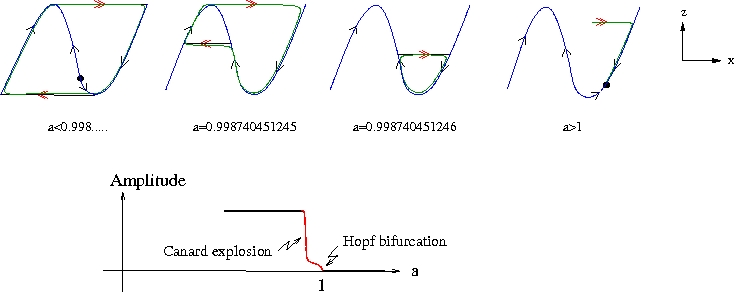
</div>


* If canards only appear for an exponentially small parameter range, then we expect them to be essentially unobservable in real data. However, canards are only nongeneric for _planar_ systems. In fast-slow systems of dimension $\ge 3$, there can be large regions of parameter space for which canards exist. Moreover, these canards tend to organize the geometry of phase space. A crucial related phenomenon is emergence of **mixed-mode oscillations**.

## II. Folded singularities in $\mathbb{R}^3$

* We consider a (1,2)-fast-slow system on $\mathbb{R}^3$ given by $$\dot{x} = g_1(x,y,z,\epsilon)$$ $$\dot{y} = g_2(x,y,z,\epsilon)$$ $$\epsilon \dot{z} = f(x,y,z,\epsilon)$$ Per our convention, the derivative here is taken with respect to slow time $\tau$. Note that $(x,y) \in \mathbb{R}^2$ are the slow variables and $z \in \mathbb{R}$ is the fast variable. If we transform from slow time $\tau$ to fast time $t := \tau/\epsilon$, we obtain the equivalent (for $\epsilon \neq 0$) system $$x' = \epsilon g_1 (x,y,z,\epsilon)$$ $$y' = \epsilon g_2 (x,y,z,\epsilon)$$ $$z' = f(x,y,z,\epsilon)$$

* The _algebraic problem/slow subsystem_ is given by taking $\epsilon \to 0$ in the slow time formulation: $$\dot{x} = g_1(x,y,z,0)$$ $$\dot{y} = g_2(x,y,z,0)$$ $$0 = f(x,y,z,0)$$ Meanwhile the _layer problem/fast subsystem_ is obtained by taking $\epsilon \to 0$ in the fast time formulation: $$x' = 0$$ $$y' = 0$$ $$z' = f(x,y,z,0)$$



* Recall the _critical manifold_ is defined to be $$S= \{(x,y,z) \in \mathbb{R}^3 \, : \, f(x,y,z,0) = 0\}$$ The layers of the fast subsystem are indexed by the $(x,y)$-plane, and stability of a point $p \in S$ as an equilibrium of the fast subsystem is determined by the sign of $({\partial f}/{\partial z})(p,0)$. Compact subsets of $S$ on which $({\partial f}/{\partial z})(p,0)$ is uniformly bounded away from zero are _normally hyperbolic_.

* A typical scenario for loss of normal hyperbolicity is the presence of a **fold curve** on the critical manifold. This is a curve entirely comprised of nondegenerate fold points (at which saddle-node bifurcations of the fast subsystem take place). A minimal assumption for existence of a fold curve is that the origin is a nondegenerate fold point on $S$: $$f(0,0,0,0) = 0$$ $$f_{z}(0,0,0,0) = 0$$ $$f_{x} (0,0,0,0)\neq 0$$ $$f_{zz}(0,0,0,0) \neq 0$$ Under these assumptions, the implicit function theorem implies that the fold curve can be parameterized by $y$; a further transformation lets us assume the fold curve is the $y$-axis.

* The nature of the reduced flow on $S$ then depends crucially on whether or not a transversality condition, called the **normal switching condition**, is met. We define $$\ell(y) = (f_x g_1 + f_y g_2)\big\vert_{(0,y,0)}$$ Note that $(f_x, f_y)$ gives the direction of $\nabla f$, and $(g_1, g_2)$ gives the direction of the vector field defining the fast-slow system. Thus, $\ell(y) = 0$ iff the flow is tangent to the fold-curve at $(0,y,0)$.

* If $\ell(0) \neq 0$, then $\ell\neq 0$ in some neighborhood of the origin, and therefore the slow flow is directed towards (or away from) the fold-curve on both branches of the critical manifold. This is the **regular fold** case, for which the only possible behavior of trajectories reaching the slow curve is to jump off the critical manifold.

* **Q:** What if $\ell(0) = 0$?

* We say the origin is a **canard point** if it is a nondegenerate fold point with $\ell(0) = 0$. These assumptions, in conjunction with normal form theory, imply that there is a smooth coordinate change in some neighborhood of the origin which brings the system into the form $$\dot{x} = by+cz + \mathcal{O}(x, \epsilon, y^2, yz, z^2)$$ $$\dot{y} = a + \mathcal{O}(x,y,z,\epsilon)$$ $$\epsilon \dot{z} = x + z^2 + \mathcal{O}(\epsilon x, \epsilon y, \epsilon z, \epsilon^2, x^2 z, z^3, xyz)$$ This can be thought of as a normal form near a canard point.

* Setting $\epsilon = 0$ in the normal form gives $$\dot{x} = by + cz + \mathcal{O}(x,y^2, yz, z^2)$$ $$\dot{y} = a + \mathcal{O}(x,y,z)$$ $$0 = x+z^2 + \mathcal{O}(x^2, z, z^3, xyz)$$ The implicit function theorem implies that we can parametrize the critical manifold in a neighborhood of the origin using $(y,z)$-coordinates. It follows that the critical manifold is (locally) the graph $$x(y,z) = -z^2 (1 + \mathcal{O}(y,z))$$

* _Some notation:_ let $S_{a}$ denote the lower, attracting branch of $S$ and $S_{r}$ denote the upper, repelling branch, so that in a neighborhood of the origin we have $$S = S_{a} \cup F \cup S_{r}$$ where $F$ is the fold curve (recall, the $y$-axis). 




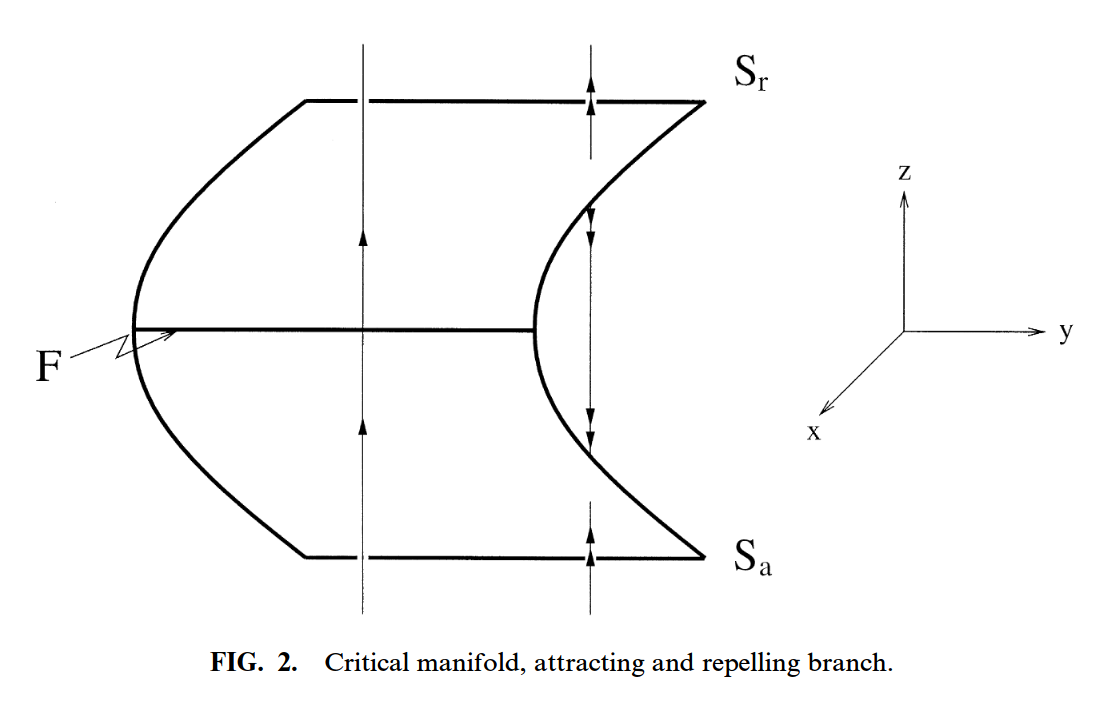

* Differentiating the function $x(y,z)$, we obtain equations of evolution for $y$ and $z$ (i.e. the projection of the reduced flow onto the $(y,z)$-plane): $$\dot{y} = a + \mathcal{O}(y,z)$$ $$-2z (1+\mathcal{O}(y,z)) \dot{z} = by + cz + \mathcal{O}(y^2, yz, z^2)$$ 


* Crucially, this system is singular at $z = 0$ (i.e. on the fold curve). Thus, the standard existence and uniqueness result for differential equations do not hold there! In particular, trajectories of this system may approach the same point on the fold-curve in finite forward or backward time.

* If we rescale time appropriately (by multiplying time by a factor $-2z(1+\mathcal{O}(y,z))$) we obtain the desingularized system $$\dot{y} = -2az + \mathcal{O}(yz, z^2)$$ $$\dot{z} = by + cz + \mathcal{O}(y^2, yz,z^2)$$


* On $S_a$, the singular and desingularized system have the same phase portrait. On $S_{r}$, i.e. $z>0$, since we have rescaled time by a negative factor, the phase portrait of the desingularized system is only the same as the singular system up to time reversal.

* After all of this work, we reach the crux of the analysis: depending on the constants $a$, $b$, $c$, the type of equilibrium at the origin for this desingularized projected reduced system will vary. Thus, we can _classify_ the dynamics in accordance with the equilibrium type.

* Let $\lambda_1$, $\lambda_2$ denote the eigenvalues of the equilibrium at the origin. If $\lambda_1 < 0 < \lambda_2$, it is a **saddle point**. If $\lambda_1 < \lambda_2 < 0$ it is a **node**.

* In both of these cases, the _reduced flow_ possesses canard like solutions that cross from the attracting sheet $S_a$ to the repelling sheet $S_r$ through the canard point at the origin. 

* **Q:** Do these _singular canards_ perturb to real canards for $\epsilon \neq 0$?

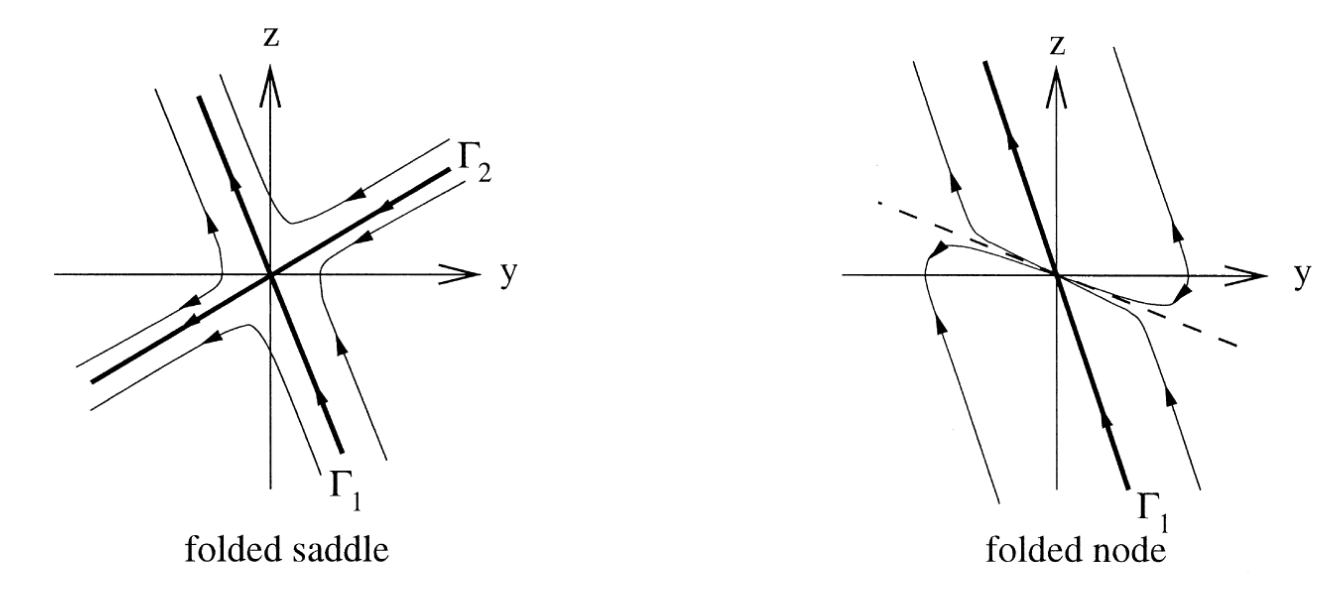

## III. Canards associated with the folded node

* Suppose we have a _folded node_, i.e. the eigenvalues of the reduced flow at the origin satisfy $\lambda_1 < \lambda_2 < 0$. In this case, we have the following important result of Szmolyan and Wechselberger:

**Theorem (Folded node canards persist):** The singular canard associated with the strong eigendirection perturbs to a real canard for sufficiently small $\epsilon > 0$. Moreover, a real canard solutions corresponding to the weak eigendirection exists for sufficiently small $\epsilon > 0$, iff $\mu := \lambda_1 / \lambda_2$ is **not** a natural number.

* The method of proof is by blowing up and studying the extensions of the slow manifolds in the blown up locus. In particular, a crucial observation is the existence of special algebraic solutions to the blown up system, which extend the singular canards.

* The _nonresonance_ condition $\mu \not \in \mathbb{N}$ can be traced to the emergence of the **Weber equation** $$u'' - 2\tau u' + 2(\mu - 1) u = 0$$ for which all solutions grow exponentially in either forward or backward time, iff $\mu \not\in \mathbb{N}$. This equation arises when studying transversality of the slow manifolds extending $S_{a}$ and $S_{r}$.

* A second, remarkable observation of Szmolyan/Wechselberger is that the eigenvalue ratio $\mu$ has a special geometric meaning:

**Theorem (The slow manifolds twist):** Suppose we are in the folded node scenario and $n-1 < \mu < n$ for some integer $n$. Then the slow manifolds $S_{a, \epsilon}$ and $S_{r,\epsilon}$ twist $n-1$ times around the maximal canard corresponding to the weak eigendirection.

* Crucially, this kind of twisting behavior does _not_ appear in the reduced $(\epsilon = 0)$ problem; instead, it is an emergent phenomenon for $\epsilon > 0$. It is very important for applications, as it is a mechanism by which _mixed mode oscillations_ can arise.

* The twisting result follows from properties of solutions to the Weber equation. In general, a recurring theme is presence of special solutions/special functions in the blown up locus.

* The twisting results in a "funnel region" of phase space in which trajectories become trapped for long time intervals before escaping. An interesting example of this kind of behavior is the _self-coupled Fitzhugh Nagumo_ equation, to which we turn now.

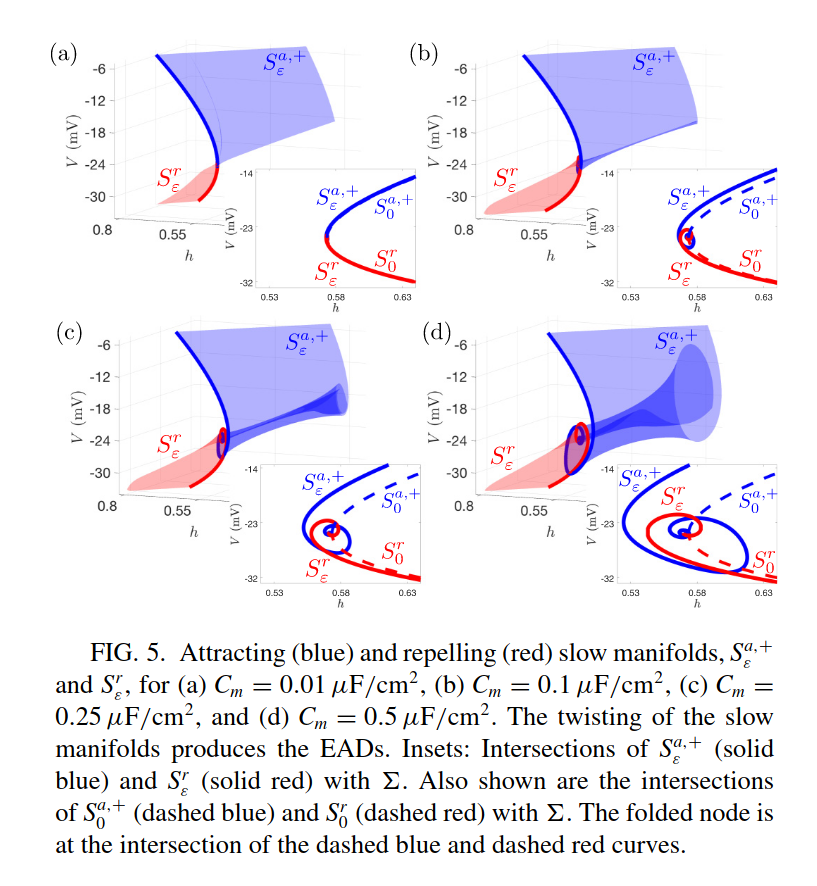

## IV. The self-coupled Fitzhugh Nagumo equation

* The **Fitzhugh Nagumo equation** is a generalization of the van der Pol equation, introduced in the 1960s as a planar caricature of the more biophysically detailed Hodgkin Huxley model for neuronal activity.

* An interesting observation of Drover et al 2004 is that _excitatory coupling_ can significantly reduce the firing rate of a network of Fitzhugh Nagumo (or Hodgkin Huxley) neurons. Wechselberger 2005 showed that this phenomenon can be attributed to the emergence of a folded node singularity.

* The cells in the network rapidly synchronize, allowing for the reduction of the entire network model to a single self-coupled neuron. At this level, it becomes feasible to explicitly identify the folded node.

* The equations of the system are $$\epsilon v' = h - \frac{v^3 - v + 1}{2} - \gamma s v$$ $$h' = -(2h + 2.6v)$$ $$\epsilon s' = \beta H(v) (1-s) - \epsilon \delta s$$ Here $v$ represents the potential difference across the neuron membrane, $h$ represents the inactivation of sodium channels, and $s$ is the synaptic coupling. The parameter $\gamma$ is the coupling strength, $\beta$ is the activation rate, and $\epsilon, \delta$ determine the decay rates of the inactivation and synapse $s$, respectively. 

* The function $H$ is a Heaviside. Thus, when $v$ rises above $0$, this initiates a long synaptic pulse that promotes higher values of $v$ following the spike. This is a form of excitatory coupling.





In [60]:
function scfn!(du, u, p, t)
    γ, ϵ, β, δ = p
    v, h, s = u
    du[1] = dv = (h - (v^3 - v + 1)/2 - γ*s*v)/ϵ
    du[2] = dh = -(2*h +2.6*v)
    du[3] = ds = (β*Float64(v > 0)*(1-s)-ϵ*δ*s)/ϵ
end

const u0 = zeros(3)
const tspan = (0.0,50.0)
const p2 = (.0,.015,.035,.565)

prob = ODEProblem(scfn!, u0, tspan, p2)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 50.0)
u0: 3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [61]:
sol = solve(prob,RK4(),abstol=1e-10,reltol=1e-10);

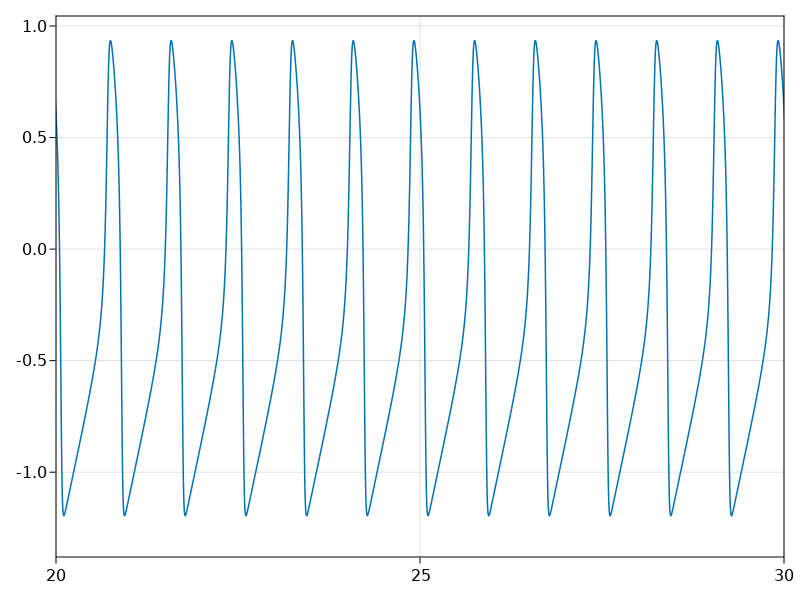

In [66]:
lines(sol.t,sol[1,:])
xlims!(20,30)
current_figure()

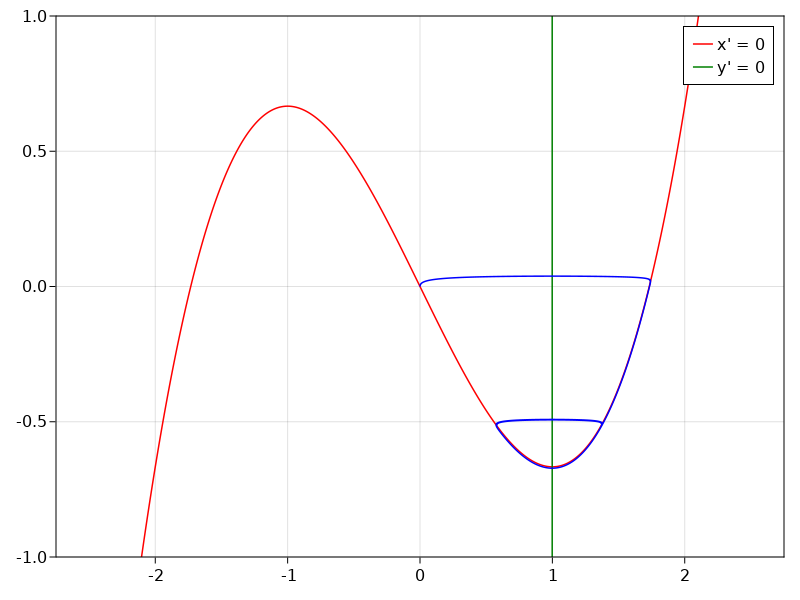

In [33]:
const u0 = zeros(2);
const tspan = (0.0,20.0);
const p = (1e-2, .998740451246);
fig, sol = vdpplot(u0, tspan, p);
fig

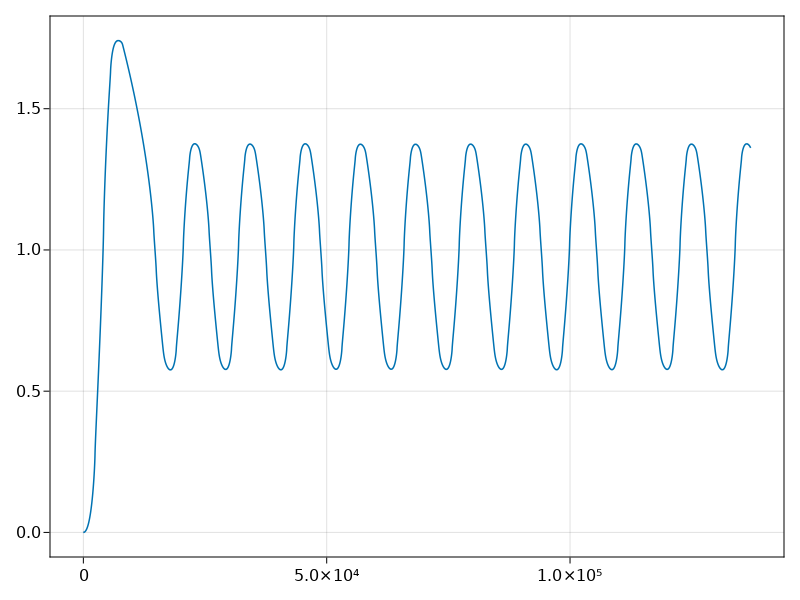

In [34]:
lines(sol[1,:])